<a href="https://colab.research.google.com/github/adirifta/Klasifikasi-Gambar/blob/main/Klasifikasi_Gambar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nama:** Adi Rifta Dwi Kurniawan <br>
**Email:** adiriftadk@gmail.com <br>
**Domisili:** Kabupaten Mojokerto

In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import time
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from google.colab import files
from PIL import Image
from tensorflow import keras
from tensorflow.keras.preprocessing import image

In [ ]:
!wget https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip
!unzip rockpaperscissors.zip

Output streaming akan dipotong hingga 5000 baris terakhir.
  inflating: rockpaperscissors/scissors/KNNsNhduqSfuqEK5.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._KNNsNhduqSfuqEK5.png  
  inflating: rockpaperscissors/scissors/xAnfzBYnsnuru9Nf.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._xAnfzBYnsnuru9Nf.png  
  inflating: rockpaperscissors/scissors/caj9PiWZ2BenuxXF.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._caj9PiWZ2BenuxXF.png  
  inflating: rockpaperscissors/scissors/5CzwWCDnxKOJz5T0.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._5CzwWCDnxKOJz5T0.png  
  inflating: rockpaperscissors/scissors/7dBQ0fOpCs03OmnR.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._7dBQ0fOpCs03OmnR.png  
  inflating: rockpaperscissors/scissors/DXQaN15KphkE4i7z.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._DXQaN15KphkE4i7z.png  
  inflating: rockpaperscissors/scissors/0CSaM2vL2cWX6Cay.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._0CSaM

In [ ]:
base_dir = 'rockpaperscissors/rps-cv-images'
categories = ['rock', 'paper', 'scissors']

train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')

os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

for category in categories:
    os.makedirs(os.path.join(train_dir, category), exist_ok=True)
    os.makedirs(os.path.join(val_dir, category), exist_ok=True)

    files = os.listdir(os.path.join(base_dir, category))
    train_files, val_files = train_test_split(files, test_size=0.4, random_state=42)

    for file in train_files:
        shutil.move(os.path.join(base_dir, category, file), os.path.join(train_dir, category, file))

    for file in val_files:
        shutil.move(os.path.join(base_dir, category, file), os.path.join(val_dir, category, file))

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=3)

In [ ]:
start_time = time.time()

history = model.fit(
    train_generator,
    epochs=15,
    validation_data=val_generator,
    callbacks=[early_stopping],
    verbose=2
)

elapsed_time_seconds = time.time() - start_time
elapsed_time_minutes = elapsed_time_seconds / 60

print("--- %s minutes ---" % elapsed_time_minutes)

Epoch 1/15
41/41 - 15s - loss: 1.2482 - accuracy: 0.3826 - val_loss: 1.0041 - val_accuracy: 0.4121 - 15s/epoch - 359ms/step
Epoch 2/15
41/41 - 13s - loss: 0.9805 - accuracy: 0.5305 - val_loss: 0.8205 - val_accuracy: 0.6301 - 13s/epoch - 319ms/step
Epoch 3/15
41/41 - 13s - loss: 0.8451 - accuracy: 0.6395 - val_loss: 0.5687 - val_accuracy: 0.8847 - 13s/epoch - 327ms/step
Epoch 4/15
41/41 - 13s - loss: 0.6849 - accuracy: 0.7287 - val_loss: 0.4395 - val_accuracy: 0.8482 - 13s/epoch - 319ms/step
Epoch 5/15
41/41 - 13s - loss: 0.6279 - accuracy: 0.7386 - val_loss: 0.3763 - val_accuracy: 0.9075 - 13s/epoch - 321ms/step
Epoch 6/15
41/41 - 12s - loss: 0.5406 - accuracy: 0.7904 - val_loss: 0.3912 - val_accuracy: 0.8664 - 12s/epoch - 296ms/step
Epoch 7/15
41/41 - 13s - loss: 0.4757 - accuracy: 0.8270 - val_loss: 0.3011 - val_accuracy: 0.8984 - 13s/epoch - 309ms/step
Epoch 8/15
41/41 - 17s - loss: 0.4992 - accuracy: 0.8064 - val_loss: 0.2518 - val_accuracy: 0.9224 - 17s/epoch - 412ms/step
Epoch 9/

Saving 0RA9rcrv8iVvuDDU.png to 0RA9rcrv8iVvuDDU.png


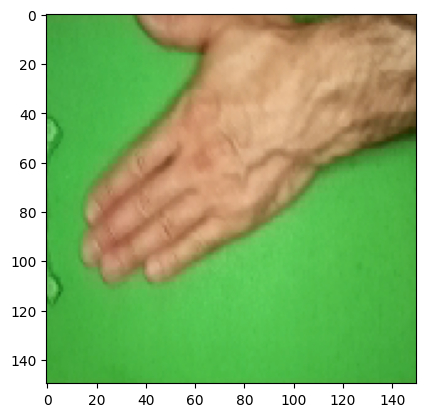

1/1 [==============================] - 0s 16ms/step
Predicted Label: Paper


In [ ]:
labels = ['Rock', 'Paper', 'Scissors']

uploaded = files.upload()

for fn in uploaded.keys():
    path = fn
    img = image.load_img(path, target_size=(150, 150))
    imgplot = plt.imshow(img)
    plt.show()

    x = image.img_to_array(img) / 255.0
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    predicted_class_index = np.argmax(model.predict(x), axis=-1)[0]
    predicted_label = labels[predicted_class_index]
    print("Predicted Label:", predicted_label)

In [ ]:
tf.keras.backend.clear_session()